In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn
seaborn.set()

In [2]:
basicData_num_x = np.arange(4,18)

In [3]:
basicData_num_y = np.array([0.254, 0.2376, 0.2542, 0.256, 0.4328, 0.3632, 0.3174, 0.3122, 0.761, 2.628,
                           19.530, 84, 424, 1740])

[[-1.17781174e+00  8.92337700e+02 -1.78932392e+04  1.27810281e+05
  -4.31866489e+05  7.49189343e+05 -6.45724898e+05  2.19332175e+05]]
0.9998130118198704
[[30974.97762045]]


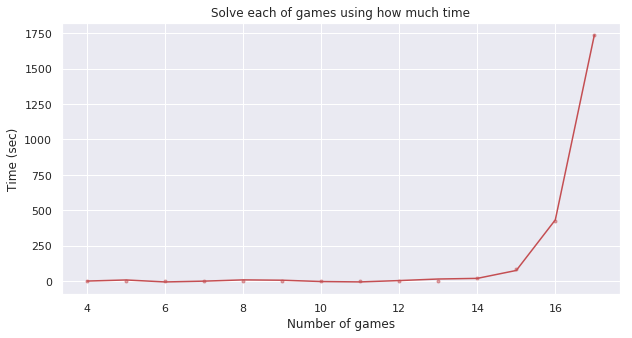

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(basicData_num_x, basicData_num_y, 'r.' , alpha = 0.5)
plt.xlabel('Number of games')
plt.ylabel('Time (sec)')
plt.title('Solve each of games using how much time')

model = make_pipeline(
    SimpleImputer(strategy='mean'), 
    MinMaxScaler(),             
    PolynomialFeatures(degree=7, include_bias=True),
    LinearRegression(fit_intercept=False)
)
reshape_x = basicData_num_x.reshape(-1,1)
reshape_y = basicData_num_y.reshape(-1,1)
model.fit(reshape_x, reshape_y)
plt.plot(reshape_x[:, 0], model.predict(reshape_x), 'r-')
print(model.named_steps['linearregression'].coef_)
print(model.score(reshape_x, reshape_y))
print(model.predict(np.array([20]).reshape(-1,1)))

In [5]:
negative_constraint_num_x = np.arange(4,24)

In [6]:
negative_constraint_num_y = np.array([0.11, 0.128, 0.102, 0.129, 0.109, 0.131, 0.163, 0.111, 0.134, 0.142,
                                     0.184, 0.192, 0.31, 0.49, 0.262, 0.257, 1.962, 1.85, 180.023, 120.009])

Text(0.5, 1.0, 'Solve each of games using how much time using negative constraint')

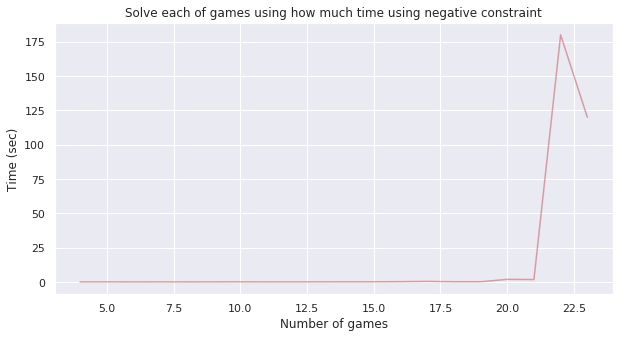

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(negative_constraint_num_x, negative_constraint_num_y, 'r-' , alpha = 0.5)
plt.xlabel('Number of games')
plt.ylabel('Time (sec)')
plt.title('Solve each of games using how much time using negative constraint')

In [18]:
chuffed_configuration_num_x = np.arange(4,40)

In [19]:
chuffed_configuration_num_y = np.array([0.11,0.04,0.03,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.05
                                        ,0.05,0.06,0.05,0.06,0.07,0.25,0.19,3.7,0.06,0.17,5.35,0.07
                                        ,0.12,0.14,0.08,0.87,5.2,0.27,0.16,0.32,25.13,4.81,0.5,7.36,1.43])

Text(0.5, 1.0, 'Solve each of games using how much time using chuffed configuration')

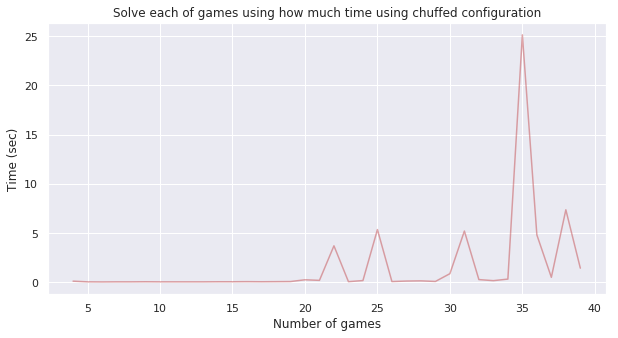

In [23]:
plt.figure(figsize = (10, 5))
#plt.plot(negative_constraint_num_x, chuffed_configuration_num_y, 'r-' , alpha = 0.5)
plt.plot(chuffed_configuration_num_x, chuffed_configuration_num_y, 'r-' , alpha = 0.5)
plt.xlabel('Number of games')
plt.ylabel('Time (sec)')
plt.title('Solve each of games using how much time using chuffed configuration')

In [12]:
lower_bound_compare_solver_x = np.arange(50, 160, 10)

In [13]:
lower_bound_compare_solver_Minizinc_y = np.array([665, 580, 1011, 900, 845, 945, 1376, 1082, 1036, 1671, 1434])
lower_bound_compare_solver_solver_y = np.array([708, 581, 1099, 1003, 992, 1063, 1567, 1265, 1205, 1948, 1647])

Text(0.5, 1.0, 'Total fun for each games')

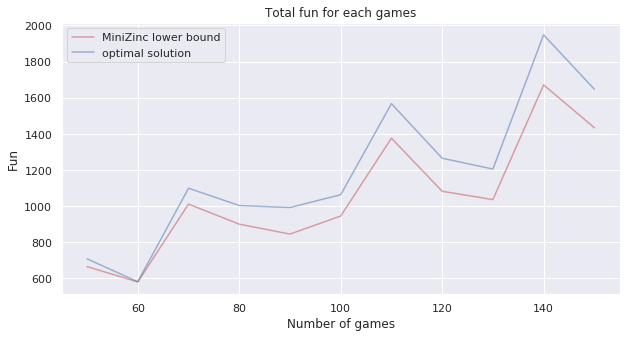

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(lower_bound_compare_solver_x, lower_bound_compare_solver_Minizinc_y, 'r-' , alpha = 0.5)
plt.plot(lower_bound_compare_solver_x, lower_bound_compare_solver_solver_y, 'b-' , alpha = 0.5)
plt.xlabel('Number of games')
plt.ylabel('Fun')
plt.legend(['MiniZinc lower bound' , 'optimal solution'])
plt.title('Total fun for each games')